# Import library

In [9]:
from ana_larissa import my_obj_function, my_obj_function2
from metapy_toolbox import metaheuristic_optimizer

# Setup and call function

### Dataset

In [10]:
# dataset
t = [0.000,
      14.322,
      27.898,
      41.326,
      54.704,
      68.060,
      81.408,
      94.750,
      108.090,
      121.430,
      134.768,
      148.108]

y_true = [0.9192425608,
        0.4453928987,
        0.2606302352,
        0.1634203618,
        0.1062287865,
        0.07053112696,
        0.04745335461,
        0.03220117156,
        0.02197534577,
        0.01505391878,
        0.01033904465,
        0.007113321483]

In [11]:
algorithm_setup = {   
                'number of iterations': 100,
                'number of population': 3,
                'number of dimensions': 2,
                'x pop lower limit': [0.01, 0.00],
                'x pop upper limit': [0.10, 0.25],
                'none variable': {'noise': True, 'noise level (%)': 2, 'x': t, 'y_true': y_true},
                'objective function': my_obj_function,
                'algorithm parameters': {
                                        'selection': {'type': 'roulette'},
                                        'crossover': {'crossover rate (%)': 82, 'type':'linear'},
                                        'mutation': {'mutation rate (%)': 12, 'type': 'hill climbing', 'cov (%)': 15, 'pdf': 'gaussian'},
                                        }
        }

# METApy settings
general_setup = {   
            'number of repetitions': 30,
            'type code': 'real code',
            'initial pop. seed': [None] * 30,
            'algorithm': 'genetic_algorithm_01',
        }

df_all_reps, df_resume_all_reps, reports, status = metaheuristic_optimizer(algorithm_setup, general_setup)

 Optimization results: 

 - Best repetition id:    14
 - Best of:               1.9261133855e-07
 - Design variables:      [0.05484464123045685, 0.17988888455319083]
 - Process time (s):      1.852263
 - Best process time (s): 0.003000


#### Best repetition

In [12]:
status

14

##### All dataset

In [13]:
df = df_resume_all_reps[status]
df

,X_0,X_1,OF BEST,FIT BET,ID BEST,X_0,X_1,OF WORST,FIT WORST,ID WORST,OF AVG,FIT AVG,ITERATION,neof
0,0.069766,0.179401,4.265626e-04,0.999574,1,0.050548,0.099750,0.002156,0.997849,0,0.001116,0.998886,0,3
1,0.069766,0.179401,4.265626e-04,0.999574,1,0.050548,0.099750,0.002156,0.997849,0,0.001116,0.998886,1,7
2,0.054586,0.182058,7.179983e-06,0.999993,2,0.069766,0.179401,0.000427,0.999574,1,0.000155,0.999845,2,13
3,0.054586,0.182058,7.179983e-06,0.999993,2,0.062176,0.180730,0.000113,0.999887,1,0.000043,0.999957,3,22
4,0.054586,0.182058,7.179983e-06,0.999993,2,0.058845,0.151686,0.000047,0.999953,1,0.000021,0.999979,4,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.054845,0.179889,1.926113e-07,1.000000,0,0.057348,0.161240,0.000002,0.999998,1,0.000001,0.999999,96,733
97,0.054845,0.179889,1.926113e-07,1.000000,0,0.057348,0.161240,0.000002,0.999998,1,0.000001,0.999999,97,742
98,0.054845,0.179889,1.926113e-07,1.000000,0,0.057348,0.161240,0.000002,0.999998,1,0.000001,0.999999,98,748
99,0.054845,0.179889,1.926113e-07,1.000000,0,0.057348,0.161240,0.000002,0.999998,1,0.000001,0.999999,99,758


In [14]:
x_0 = list(df['X_0'].iloc[-1])[0]
x_1 = list(df['X_1'].iloc[-1])[0]
x_best = [x_0, x_1] 
x_best

[0.05484464123045685, 0.17988888455319083]

In [15]:
y_true, y_pred, t = my_obj_function2(x_best, algorithm_setup['none variable'])

True


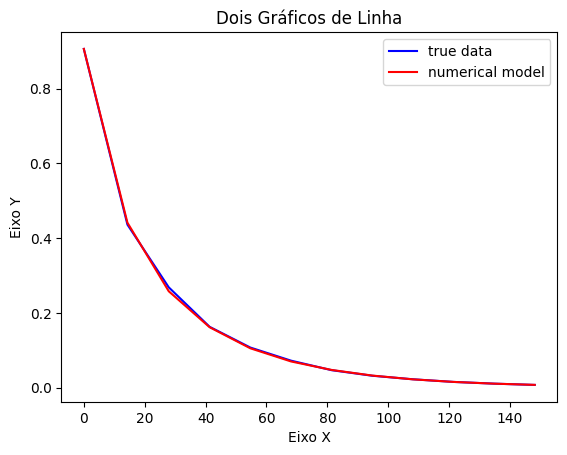

In [16]:
import matplotlib.pyplot as plt

# Plotagem dos gráficos
plt.plot(t, y_true, label='true data', color='blue')
plt.plot(t, y_pred, label='numerical model', color='red')

# Adicionando rótulos aos eixos
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Adicionando título ao gráfico
plt.title('Dois Gráficos de Linha')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()